## Day 6

In [1]:
from aocd import get_data
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=6)

In [2]:
import ipytest
ipytest.autoconfig()

# Part 1

$$ f(x) = x \times (k - x) = - x^2 + kx $$

$$ -x^2 + kx - r = 0 $$

$$ x_0 = \frac{k \pm \sqrt{k^2 - 4r}}{2} $$

In [3]:
from inspect import cleandoc

example = cleandoc("""
    Time:      7  15   30
    Distance:  9  40  200
""")

def parse(text):
    times, distances = text.split("\n")
    
    times = list(map(int, times.split(":")[1].strip().split()))
    record_distances = list(map(int, distances.split(":")[1].strip().split()))
    return list(zip(times, record_distances))

example_races = parse(example)

In [4]:
def distance(button_time, total_time):
    return button_time * (total_time - button_time)

In [5]:
%%ipytest -qq

import pytest

@pytest.mark.parametrize("button_time, total_time, expected", [
    (0, 7, 0),
    (7, 7, 0),
    (1, 7, 6),
    (6, 7, 6),
    (2, 7, 10),
    (5, 7, 10),
    (3, 7, 12),
    (4, 7, 12),
])
def test_distance(button_time, total_time, expected):
    assert distance(button_time, total_time) == expected

........                                                                                     [100%]


In [6]:
from functools import reduce
from operator import mul
from math import sqrt, ceil, floor


def winning_strategy_count(total_time, record_distance):
    x_1 = (total_time + sqrt(total_time**2 - 4*record_distance)) / 2
    x_2 = (total_time - sqrt(total_time**2 - 4*record_distance)) / 2
    return ceil(x_1 - 1) - floor(x_2 + 1) + 1


def winning_strategy_count_product(races):
    return reduce(mul, (
        winning_strategy_count(*race)
        for race in races
    ))

winning_strategy_count_product(example_races)

288

In [7]:
answer(winning_strategy_count_product(parse(data)))

**Answer** = 4403592

## Part 2

In [8]:
def parse2(text):
    time, record_distance = text.split("\n")

    time = int(time.replace("Time:", "").replace(" ", ""))
    record_distance = int(record_distance.replace("Distance:", "").replace(" ", ""))

    return (time, record_distance)


answer(winning_strategy_count(*parse2(data)))

**Answer** = 38017587

time: 49979494
record: 263153213781851


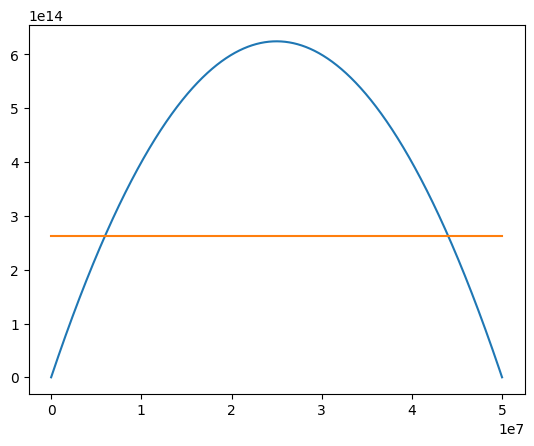

In [9]:
from matplotlib import pyplot

races = parse2(data)
print(f"time: {races[0]}\nrecord: {races[1]}")

xs = list(range(0, races[0], 100))
ys = [distance(x, races[0]) for x in xs]

pyplot.plot(xs, ys)
pyplot.plot([0, races[0]], [races[1], races[1]])